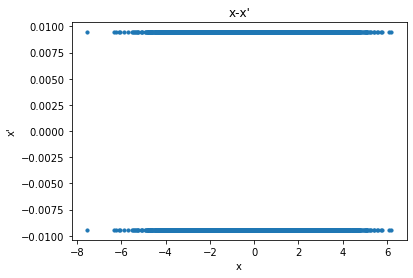

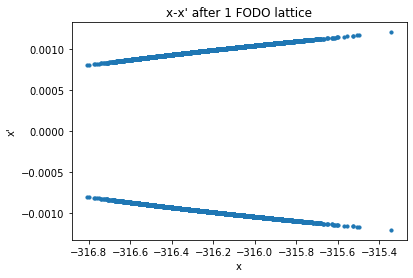

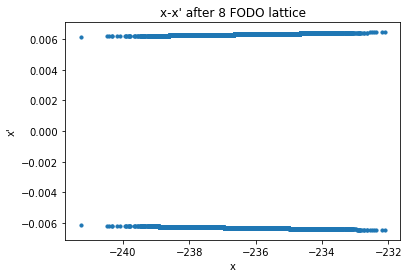

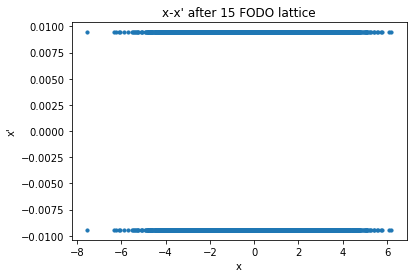

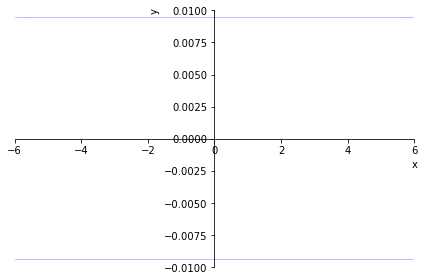

In [1]:
import numpy as np
from numpy.linalg import matrix_power
import random
import math
import matplotlib.pyplot as plt
from sympy.plotting import plot_implicit
from sympy import *

# Q = (0.4375 * (q**2)) - 3.732
# P = (p**2) * 0.375
# plot_implicit(P+Q)

beta_Twiss = 33.7E3 #mm
emittance = 3*np.pi #mm*mrad
eps = 3. #mm
mu = 96/180*np.pi

#ellipse semi axes
a = np.sqrt(beta_Twiss*eps)
b = np.sqrt(eps/beta_Twiss)

width = 4. #mm
sigma = width/(np.sqrt(8*np.log(2)))

N = 10000
x = np.zeros(2*N)
x_prime = np.zeros(2*N)
x1 = np.zeros(2*N)
x1_prime = np.zeros(2*N)
x8 = np.zeros(2*N)
x8_prime = np.zeros(2*N)
x15 = np.zeros(2*N)
x15_prime = np.zeros(2*N)
phi = np.zeros(N)

M = np.array([[math.cos(mu), beta_Twiss*math.sin(mu)], [-math.sin(mu)/beta_Twiss, math.cos(mu)]])  #transition matrix
M8 = matrix_power(M, 8)
M15 = matrix_power(M, 15)


for i in range(N):
    x[i] = random.gauss(0, sigma)
    x[N+i] = x[i]
    phi[i] = math.acos(x[i]/np.sqrt(beta_Twiss*eps))
    x_prime[i] = -np.sqrt(eps/beta_Twiss)*math.sin(phi[i])
    x_prime[N+i] = -x_prime[i]
    x1[i] = np.sqrt(beta_Twiss*eps)*math.cos(mu+phi[i])
    x1[N+i] = x1[i]
    x1_prime[i] = -np.sqrt(eps/beta_Twiss)*math.sin(mu+phi[i])
    x1_prime[N+i] = -x1_prime[i]
    x8[i] = M8[0][0]*x[i] + M8[0][1]*x_prime[i]
    x8[N+i] = x8[i]
    x8_prime[i] = M8[1][0]*x[i] + M8[1][1]*x_prime[i]
    x8_prime[N+i] = -x8_prime[i]
    x15[i] = M15[0][0]*x[i] + M15[0][1]*x_prime[i]
    x15[N+i] = x15[i]
    x15_prime[i] = M15[1][0]*x[i] + M15[1][1]*x_prime[i]
    x15_prime[N+i] = -x15_prime[i]

plt.scatter(x, x_prime, s=10)
plt.title("x-x'")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

#Because the value of beta is too large, the ellipse looks like 2 parallel lines. This agrees with the ellipse plot at the bottom.


plt.scatter(x1, x1_prime, s=10)
plt.title("x-x' after 1 FODO lattice")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

plt.scatter(x8, x8_prime, s=10)
plt.title("x-x' after 8 FODO lattice")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

plt.scatter(x15, x15_prime, s=10)
plt.title("x-x' after 15 FODO lattice")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

x, y = symbols('x y')
f = x**2/a**2 + y**2/b**2 - 1
# Q = q**2/b**2 - 1
# P = p**2/a**2
plot_implicit(f, (x, -6, 6),(y,-0.01,0.01), line_color="blue")